In [1]:
# Importing Libraries
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
max_temperature = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temperature = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month = np.array(range(0,12))

In [3]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      max_temperature, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      min_temperature, [-40, 20, 0])

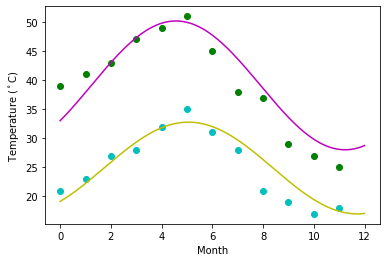

In [4]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(month, max_temperature, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(month, min_temperature, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

In [5]:
# Visualizing Titanic Dataset
df= pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


([<matplotlib.patches.Wedge at 0x29d391d3148>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'Male'),
  Text(0.48083667958064136, -0.9893412391939719, 'Female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.40%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.60%')])

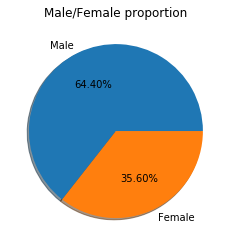

In [6]:
plt.title("Male/Female proportion")
plt.pie(df["sex"].value_counts(),labels=["Male","Female"],shadow=True,autopct='%1.2f%%')

<Figure size 432x288 with 0 Axes>

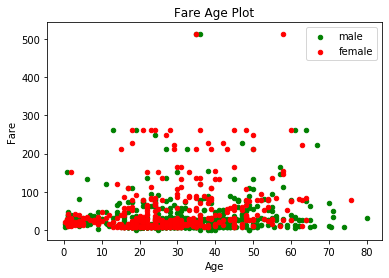

In [11]:
plt.figure()
category1 = df[df.sex=='male'].plot.scatter('age', 'fare', color='green',label='male')
df[df.sex=='female'].plot.scatter('age', 'fare',color='red',label='female',ax=category1)
plt.legend(loc = 'upper right') 
plt.title("Fare Age Plot")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()
